In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
tensors, labels, sn = load_tensors('./defect_tensors/Test_Water_Paper/1A/')

In [3]:
tensor_dict = load_tensors_all('./defect_tensors/Test_Water_Paper/')

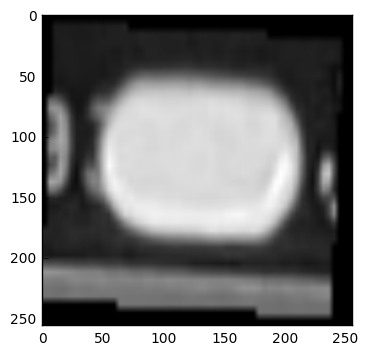

In [4]:
plt.imshow(tensor_dict['7A']['tensors'][0], cmap='gray')
plt.savefig('./quiver/gray_test.jpg')

In [5]:
tensors, labels, sn= combine_shuffle_tensors(tensor_dict)

the final tensor should be 1284
number of class 0: 656
number of class 1: 541
number of class 2: 87


In [6]:
set([item.split('/')[0] for item in sn[labels == 0]])

{'1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'}

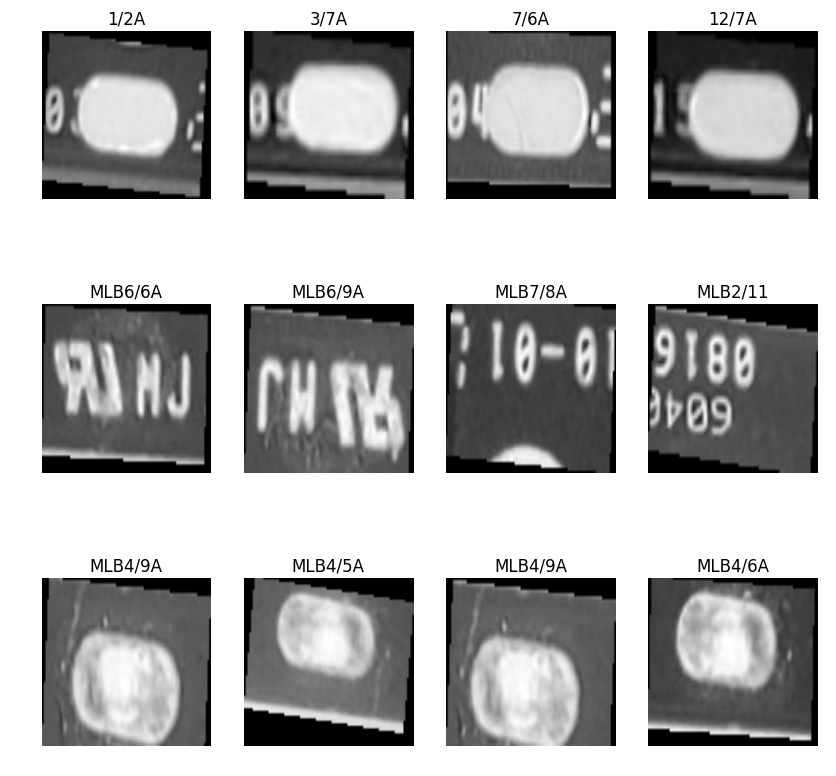

In [7]:
display_tensor(tensors, labels, sn)

In [8]:
from defectlib import random_modeling

In [9]:
model = random_modeling(tensors, labels, nb_classes=3, nb_epoch=1)

Train on 898 samples, validate on 386 samples
Epoch 1/1
898/898 [==============================] - 79s - loss: 0.4527 - acc: 0.8396 - val_loss: 0.1101 - val_acc: 0.9378


In [10]:
from quiver_engine import server

In [ ]:
server.launch(model, input_folder='./quiver/')

127.0.0.1 - - [2016-11-22 08:55:16] "GET /model HTTP/1.1" 200 4896 0.002649
127.0.0.1 - - [2016-11-22 08:55:16] "GET /inputs HTTP/1.1" 200 162 0.001665
[2016-11-22 08:55:20,316] ERROR in app: Exception on /layer/activation_1/gray_test.jpg [GET]
Traceback (most recent call last):
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/flask/app.py", line 1988, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/flask/app.py", line 1641, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/flask_cors/extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/flask/app.py", line 1544, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/

In [8]:
from defectlib import KFold_modeling

In [9]:
info_string, models = KFold_modeling(tensors, labels)

0it [00:00, ?it/s]

Train on 856 samples, validate on 428 samples
Epoch 1/10
856/856 [==============================] - 105s - loss: 0.4097 - acc: 0.8364 - val_loss: 0.1076 - val_acc: 0.9533
Epoch 2/10
856/856 [==============================] - 99s - loss: 0.0806 - acc: 0.9743 - val_loss: 0.0508 - val_acc: 0.9813
Epoch 3/10
856/856 [==============================] - 115s - loss: 0.0457 - acc: 0.9801 - val_loss: 0.0567 - val_acc: 0.9860
Epoch 4/10
856/856 [==============================] - 137s - loss: 0.0323 - acc: 0.9918 - val_loss: 0.0286 - val_acc: 0.9883
Epoch 5/10
856/856 [==============================] - 135s - loss: 0.0276 - acc: 0.9918 - val_loss: 0.0355 - val_acc: 0.9953
Epoch 6/10
856/856 [==============================] - 138s - loss: 0.0169 - acc: 0.9953 - val_loss: 0.0208 - val_acc: 0.9953
Epoch 7/10
856/856 [==============================] - 140s - loss: 0.0166 - acc: 0.9942 - val_loss: 0.0404 - val_acc: 0.9907
Epoch 8/10
856/856 [==============================] - 137s - loss: 0.0236 - acc:

1it [21:31, 1291.50s/it]

('Sore log_loss: ', 0.014572800254285046)
Train on 856 samples, validate on 428 samples
Epoch 1/10
856/856 [==============================] - 142s - loss: 0.4025 - acc: 0.8341 - val_loss: 0.1007 - val_acc: 0.9369
Epoch 2/10
856/856 [==============================] - 135s - loss: 0.0610 - acc: 0.9825 - val_loss: 0.0238 - val_acc: 0.9907
Epoch 3/10
856/856 [==============================] - 142s - loss: 0.0163 - acc: 0.9977 - val_loss: 0.0092 - val_acc: 0.9953
Epoch 4/10
856/856 [==============================] - 150s - loss: 0.0176 - acc: 0.9965 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 5/10
856/856 [==============================] - 138s - loss: 0.0178 - acc: 0.9918 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 6/10
856/856 [==============================] - 152s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 7/10
856/856 [==============================] - 145s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 8/10
856/856 [=================

2it [45:46, 1340.59s/it]

('Sore log_loss: ', 0.0064780994545992768)
Train on 856 samples, validate on 428 samples
Epoch 1/10
856/856 [==============================] - 146s - loss: 0.5461 - acc: 0.7967 - val_loss: 0.0744 - val_acc: 0.9509
Epoch 2/10
856/856 [==============================] - 144s - loss: 0.0785 - acc: 0.9673 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 3/10
856/856 [==============================] - 135s - loss: 0.0582 - acc: 0.9801 - val_loss: 0.0119 - val_acc: 0.9977
Epoch 4/10
856/856 [==============================] - 143s - loss: 0.0291 - acc: 0.9895 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 5/10
856/856 [==============================] - 137s - loss: 0.0123 - acc: 0.9988 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 6/10
856/856 [==============================] - 133s - loss: 0.0152 - acc: 0.9965 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 7/10
856/856 [==============================] - 133s - loss: 0.0112 - acc: 0.9965 - val_loss: 5.3626e-04 - val_acc: 1.0000
Epoch 8/10
856/856 [============

3it [1:09:10, 1359.57s/it]

('Sore log_loss: ', 0.0001366354621443308)


In [24]:
cv2.imwrite('./quiver/', tensors[0])

error: /Users/hadoop1/opencv/modules/imgcodecs/src/loadsave.cpp:439: error: (-2) could not find a writer for the specified extension in function imwrite_


In [23]:
cv2.imwrite?

In [25]:
from PIL import Image

In [26]:
im = Image.fromarray(tensors[0])

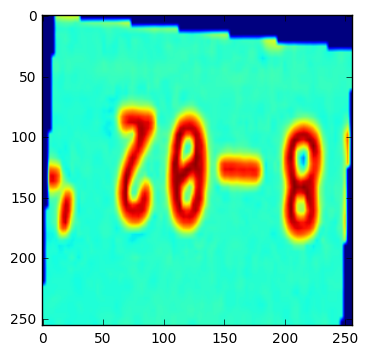

In [33]:
plt.imshow(tensors[0])
plt.savefig('./quiver/test.jpg')

In [17]:
from defectlib import random_modeling

In [19]:
model = random_modeling(tensors, labels, nb_classes=3, nb_epoch=1)

In [20]:
model

In [18]:
random_modeling?

In [44]:
from quiver_engine import server

In [ ]:
server.launch(models[0], input_folder='./quiver/')